Hello Everyone, We have a dataset of clinical Heart Diease and people who got affected with respect their age, gender and cause of death and survive from the diease, 

Here we are going to use clustring, unsupervised machine learning problem, with respect K-Means and DBSCAN

[KMeans Clustring Reference From Youtube](https://www.youtube.com/c/Siddhardhan/videos)  <br>
[DBSCAN Reference From Kaggle](https://www.kaggle.com/code/datark1/customers-clustering-k-means-dbscan-and-ap) <br>
[DBSCAN Reference From Youtube](https://www.youtube.com/watch?v=C3r7tGRe2eI&ab_channel=KrishNaik) <br>
[KMeans Clustring Youtube Reference](https://www.youtube.com/watch?v=EItlUEPCIzM&ab_channel=codebasics) <br>

In [31]:
#all the required tools and libs

import pandas as pd
from scipy.stats import pearsonr
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import plot, iplot, init_notebook_mode
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff
from sklearn.cluster import KMeans 
from sklearn.cluster import DBSCAN
import plotly.io as pio
%matplotlib inline
warnings.filterwarnings("ignore")
pio.renderers.default = "png"
import plotly.offline as py
py.offline.init_notebook_mode(connected=True)

In [32]:
# source
path = r'heart_failure_clinical_records_dataset.csv'

In [33]:
# creating da dataframe object and storing data into it

df = pd.read_csv(path)

In [34]:
# DataFrame First 5 Rows
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [35]:
# DataFrame last 5 Rows
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [36]:
# DataFrame Shape
df.shape

(299, 13)

In [37]:
# DataFrame Columns Names
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [38]:
# Checking Null Values in the columns and Summing the nulls

df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [39]:
# A Distribution Show Using Pie Plot From Plotly

colors = ['#D8B5E6', '#7295DA']
labels = ['Normal','diabetes']
values = df['diabetes'].value_counts()/df['diabetes'].shape[0]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(
    title_text="Diabetes",
    title_font_color="black",
    legend_title_font_color="yellow",
    paper_bgcolor="white",
    plot_bgcolor='black',
    font_color="black",
)
fig.show()

In [40]:
# A Distribution Show Using Pie Plot From Plotly

fig = px.pie(df, values='diabetes',names='DEATH_EVENT', title='Diabetes Death Event Ratio')
fig.show()

In [41]:
# A Histogram with Density Show Using Pie Plot From Plotly

hist_data =[df["age"].values]
group_labels = ['age'] 

fig = ff.create_distplot(hist_data, group_labels, colors=['red'])
fig.update_layout(title_text='Age Distribution plot')

fig.show()

In [42]:
# Gender Wise Box Plot

fig = px.box(df, x='sex', y='age', points='all')
fig.update_layout(
    title_text="Gender wise Age Spread - Male = 1 Female =0")
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()


In [43]:
# Analysis using Plotly which tells us about survived people from Cancer

male = df[df["sex"]==1]
female = df[df["sex"]==0]

male_survi = male[df["DEATH_EVENT"]==0]
male_not = male[df["DEATH_EVENT"]==1]
female_survi = female[df["DEATH_EVENT"]==0]
female_not = female[df["DEATH_EVENT"]==1]

labels = ['Male - Survived','Male - Not Survived', "Female -  Survived", "Female - Not Survived"]
values = [len(male[df["DEATH_EVENT"]==0]),len(male[df["DEATH_EVENT"]==1]),
         len(female[df["DEATH_EVENT"]==0]),len(female[df["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on Survival - Gender")
fig.show()

In [44]:
surv = df[df["DEATH_EVENT"]==0]["age"]
not_surv = df[df["DEATH_EVENT"]==1]["age"]
hist_data = [surv,not_surv]
group_labels = ['Survived', 'Not Survived']
fig = ff.create_distplot(hist_data, group_labels, bin_size=0.5, colors=['blue', 'orange'])
fig.update_layout(
    title_text="Analysis in Age on Survival Status")
fig.show()

<AxesSubplot:>

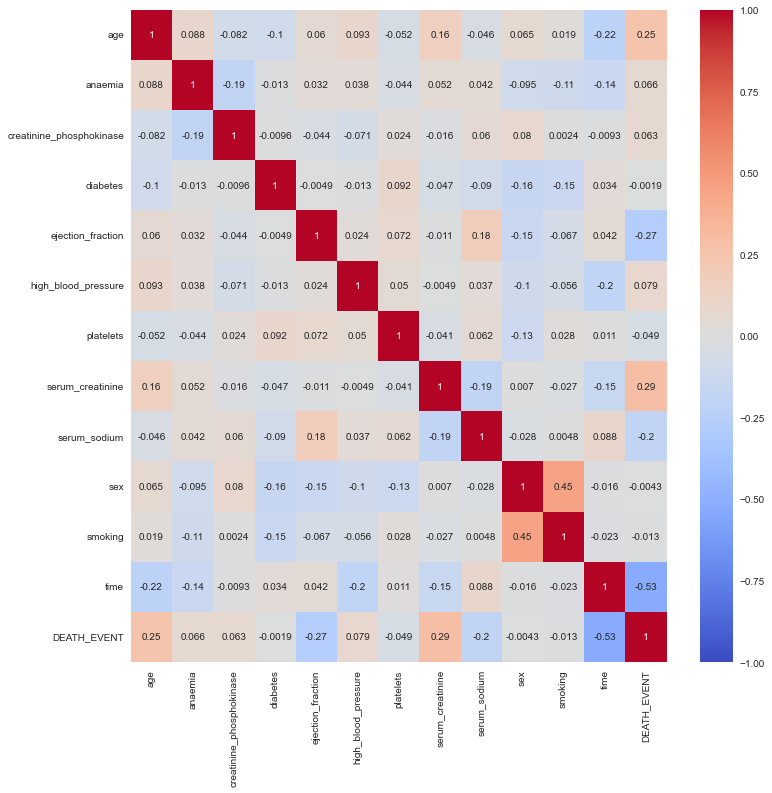

In [45]:
# Heat Map with Data Correlation

plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), vmin=-1, cmap='coolwarm', annot=True)

In [46]:
# Distribution of male v/s Female 

colors = ['red', 'blue']
labels = ['Male','Female']
values = df['sex'].value_counts()/df['sex'].shape[0]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(
    title_text="Males Vs Female",
    title_font_color="black",
    legend_title_font_color="yellow",
    paper_bgcolor="white",
    plot_bgcolor='black',
    font_color="black",
)
fig.show()

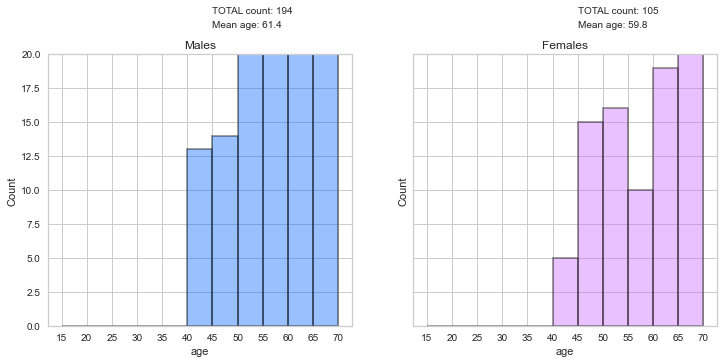

In [47]:
males_age = df[df['sex']==1]['age'] # subset with males age
females_age = df[df['sex']==0]['age'] # subset with females age

age_bins = range(15,75,5)

# males histogram
fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5), sharey=True)
sns.distplot(males_age, bins=age_bins, kde=False, color='#0066ff', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
ax1.set_xticks(age_bins)
ax1.set_ylim(top=20)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(45,23, "TOTAL count: {}".format(males_age.count()))
ax1.text(45,22, "Mean age: {:.1f}".format(males_age.mean()))

# females histogram
sns.distplot(females_age, bins=age_bins, kde=False, color='#cc66ff', ax=ax2, hist_kws=dict(edgecolor="k", linewidth=2))
ax2.set_xticks(age_bins)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(45,23, "TOTAL count: {}".format(females_age.count()))
ax2.text(45,22, "Mean age: {:.1f}".format(females_age.mean()))

plt.show()

In [48]:
males_death = df[df['sex']==1]['DEATH_EVENT'] # subset with males income
females_death = df[df['sex']==0]['DEATH_EVENT'] # subset with females income


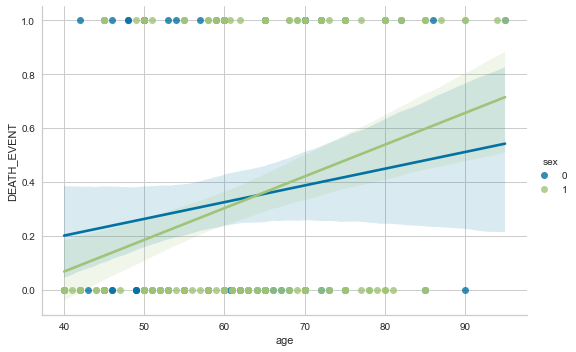

In [49]:
# Implot with Respect Age and Death Events of male age and female age 

corr1, _ = pearsonr(males_age.values, males_death.values)
corr2, _ = pearsonr(females_age.values, females_death.values)

sns.lmplot('age', 'DEATH_EVENT', data=df, hue='sex',aspect=1.5)
plt.show()

In [50]:
# Our Data Which we are going to use for the clustring

x = df[['serum_sodium', 'ejection_fraction', 'age']]

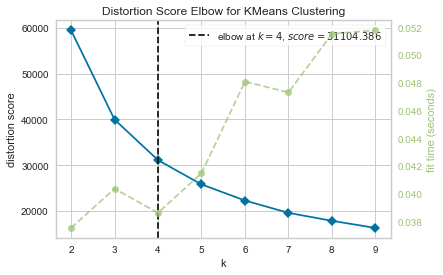

In [51]:
# Method Suggest us how many cluster to form from 2 to 10

from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(x)
visualizer.show()
plt.show()

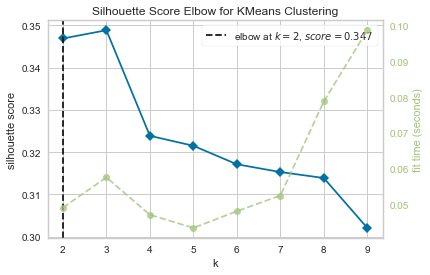

In [52]:
# Our Silhouette Score suggest us 2 Cluster

model = KMeans(random_state=2)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')

visualizer.fit(x)
visualizer.show()
plt.show()

In [53]:
# initialise and fit K-Means model, we want 4 clusters to form 

KM_4_clusters = KMeans(n_clusters=4, init='k-means++').fit(x) 

KM4_clustered = x.copy()
KM4_clustered.loc[:,'Cluster'] = KM_4_clusters.labels_

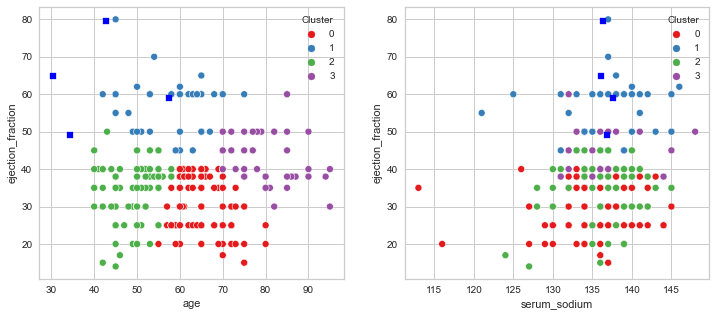

In [54]:
# Scatter plot for our clusters

fig1, (axes) = plt.subplots(1,2,figsize=(12,5))


scat_1 = sns.scatterplot('age', 'ejection_fraction', data=KM4_clustered,
                hue='Cluster', ax=axes[0], palette='Set1', legend='full')

sns.scatterplot('serum_sodium', 'ejection_fraction', data=KM4_clustered,
                hue='Cluster', palette='Set1', ax=axes[1], legend='full')

axes[0].scatter(KM_4_clusters.cluster_centers_[:,1],KM_4_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
axes[1].scatter(KM_4_clusters.cluster_centers_[:,0],KM_4_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
plt.show()

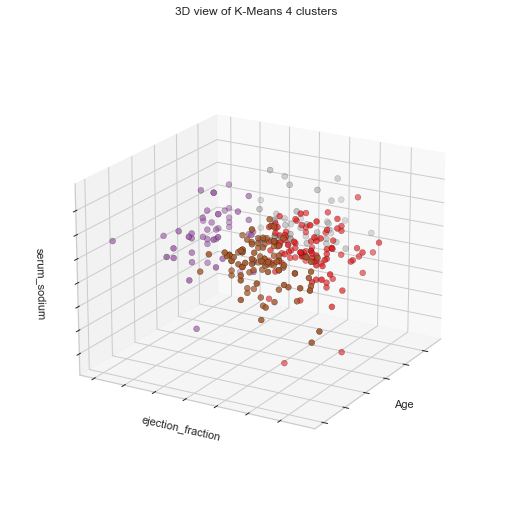

In [55]:
# 3-D Plot of our 4 clusters

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7, 7))
ax = Axes3D(fig, rect=[0, 0, .99, 1], elev=20, azim=210)
ax.scatter(KM4_clustered['age'],
           KM4_clustered['ejection_fraction'],
           KM4_clustered['serum_sodium'],
           c=KM4_clustered['Cluster'],
           s=35, edgecolor='k', cmap=plt.cm.Set1)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Age')
ax.set_ylabel('ejection_fraction')
ax.set_zlabel('serum_sodium')
ax.set_title('3D view of K-Means 4 clusters')
ax.dist = 12

plt.show()

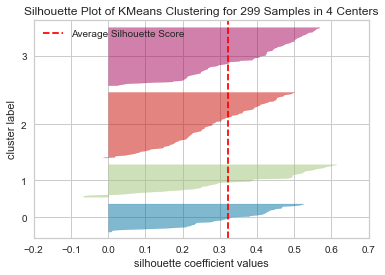

In [56]:
# To check the quality of each cluster we can examine the Silhuette plot.

from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(n_clusters=4, random_state=0)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(x)
visualizer.show()
plt.show()

In [61]:
# eps= 5 and min_samples= 5, Density base Clustring and with 4 min samples needed to make a cluster

DBS_clustering = DBSCAN(eps=5, min_samples=5).fit(x)

DBSCAN_clustered = x.copy()
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_ # append labels to points

In [58]:
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

,DBSCAN_size
Cluster,
-1,68
0,186
1,7
2,6
3,22
4,5
5,5


DBSCAN created 5 clusters plus outliers cluster (-1). There are 68 outliers.

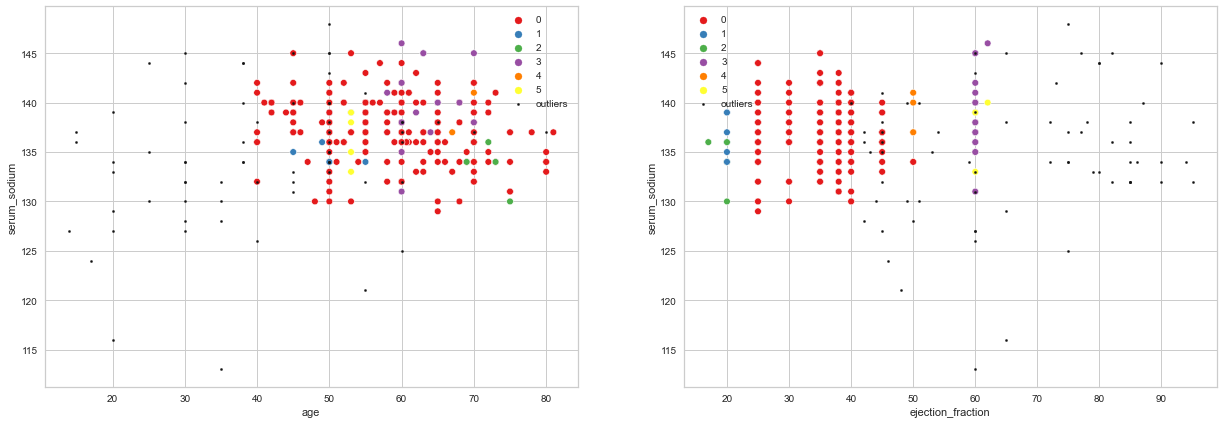

In [59]:
outliers = DBSCAN_clustered[DBSCAN_clustered['Cluster']==-1]

fig2, (axes) = plt.subplots(1,2,figsize=(21,7))


sns.scatterplot('age', 'serum_sodium',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                hue='Cluster', ax=axes[0], palette='Set1', legend='full', s=45)

sns.scatterplot('ejection_fraction', 'serum_sodium',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                hue='Cluster', palette='Set1', ax=axes[1], legend='full', s=45)

axes[0].scatter(outliers['ejection_fraction'], outliers['serum_sodium'], s=5, label='outliers', c="k")
axes[1].scatter(outliers['age'], outliers['serum_sodium'], s=5, label='outliers', c="k")
axes[0].legend()
axes[1].legend()

plt.setp(axes[0].get_legend().get_texts(), fontsize='10')
plt.setp(axes[1].get_legend().get_texts(), fontsize='10')

plt.show()


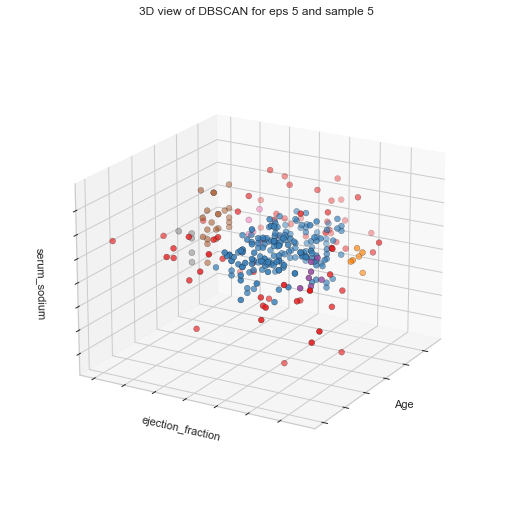

In [62]:
# 3-D Plot for DBSCAN

fig = plt.figure(figsize=(7, 7))
ax = Axes3D(fig, rect=[0, 0, .99, 1], elev=20, azim=210)
ax.scatter(DBSCAN_clustered['age'],
           DBSCAN_clustered['ejection_fraction'],
           DBSCAN_clustered['serum_sodium'],
           c=DBSCAN_clustered['Cluster'],
           s=35, edgecolor='k', cmap=plt.cm.Set1)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Age')
ax.set_ylabel('ejection_fraction')
ax.set_zlabel('serum_sodium')
ax.set_title('3D view of DBSCAN for eps 5 and sample 5')
ax.dist = 12

plt.show()